In [1]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import csv
import seaborn as sns
import math
from PIL import Image

In [38]:
def dead_tube_check(input_file):
    df = pd.read_csv(input_file, delimiter=",")

    if len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]) > 0:
        number=len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
        print(str(number) + " dead tubes are suppressed.")
        display(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
    else:
        display("There are no dead tubes.")

In [39]:
def summary_hist(input_file, save_folder):
    df = pd.read_csv(input_file, delimiter=",")
    df=df.loc[df['Resolution[um]']>0]
    df.hist(column=['T0[ns]', 'TMax[ns]',
        'ADC_peak[ns]', 'ADC_width[ns]', 'Resolution[um]', 'Efficiency'], bins=30, layout =(2,3), figsize= (15,5), color='skyblue', edgecolor='black', grid=False)
    plt.suptitle(input_file)
    #plt.show()
    plt.savefig(save_folder+"\\"+"hist.png", bbox_inches="tight")
    plt.close()

In [40]:
def heatmaps(input_file, save_path):

    heatmap_files=[]
    df = pd.read_csv(input_file, delimiter=",")
    df=df.loc[df['Resolution[um]']>0]
    df_rename=df.rename(columns={"Column": "Tube Number"}, inplace=False)
    for col in ['T0[ns]', 'TMax[ns]',
        'ADC_peak[ns]', 'ADC_width[ns]', 'Resolution[um]', 'Efficiency']:

        #Create heatmap
        heatmap_data=df_rename.pivot_table(index=df_rename["Layer"], columns=df_rename["Tube Number"], values=col)
        dcol=5
        min=0
        max=df_rename["Tube Number"].max()
        nsteps=int(max/dcol)+1
        arr=np.linspace(min,max,nsteps, dtype=int)
        heatmap_sorted=heatmap_data.sort_values(by='Layer', ascending=False)
        plt.figure(figsize=(5,3))
        ax=plt.axes()
        plotting=sns.heatmap(heatmap_sorted, annot=False, cmap='viridis', ax=ax, )
        plotting.set_xticks(arr)
        plotting.set_xticklabels(list(map(str,arr)))
        title, throwaway=input_file.split(".txt")
        plotting.set_title(col + " " + title)
        #plt.show()
        plt.savefig(save_path+"\\"+col+".png", bbox_inches="tight")
        plt.close()

        heatmap_files.append(col+".png")
    
    return heatmap_files
    

In [41]:
# function to create folder

def create_folder(file, desired_location):
    keep, throwaway=file.split(".txt")
    keep=keep+"_plots"
    new_folder_path=desired_location+r"\\"+keep
    
    if os.path.isdir(new_folder_path):
        print(f"The folder '{new_folder_path}' exists.")
    else:
        os.mkdir(new_folder_path)
    return new_folder_path

In [42]:
def concat_imgs(list_of_files, folder_path, columns, new_file_name):
    widths=[]
    heights=[]
    images=[]
    for i in list_of_files:
        img=Image.open(folder_path+"\\"+i)
        images.append(img)
        w,h=img.size
        widths.append(w)
        heights.append(h)
    #print(widths)
    indiv_w=np.max(widths)
    indiv_h=np.max(heights)

    rows=rows=math.ceil(len(list_of_files)/columns)
    
    new_image=Image.new('RGB',(int(indiv_w*columns),int(indiv_h*rows)), (255,255,255))
    

    # put plots on new image
    for i in range(0,len(images)):
        #find row to populate
        new_row=math.floor(i/columns)

        #find col to populate
        new_col=math.ceil(i % columns)

        new_image.paste(images[i], ((new_col*indiv_w), (new_row*indiv_h)))

    # save
    new_image.save(folder_path+"\\"+new_file_name+".png")

In [43]:
def filter_func(input_file, parameter, spec, greater_less):
    df = pd.read_csv(input_file, delimiter=",")

    #Make cuts to identify outlier tubes
    if parameter=="to":
        sorted_df = df.sort_values(by="T0[ns]")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["T0[ns]"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["T0[ns]"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    if parameter=="tmax":
        sorted_df = df.sort_values(by="TMax[ns]")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["TMax[ns]"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["TMax[ns]"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    if parameter=="adcp":
        sorted_df = df.sort_values(by="ADC_peak[ns]")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["ADC_peak[ns]"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["ADC_peak[ns]"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    if parameter=="adcw":
        sorted_df = df.sort_values(by="ADC_width[ns]")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["ADC_width[ns]"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["ADC_width[ns]"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    if parameter=="res":
        sorted_df = df.sort_values(by="Resolution[um]")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["Resolution[um]"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["Resolution[um]"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    if parameter=="eff":
        sorted_df = df.sort_values(by="Efficiency")
        if greater_less=="G":
            filtered_df=sorted_df[(sorted_df["Efficiency"]>spec)].iloc[:,:]
            display(filtered_df)
        elif greater_less=="L":
            filtered_df=sorted_df[(sorted_df["Efficiency"]<spec)].iloc[:,:]
            display(filtered_df)
        else:
            print("No filtering specified")
    return filtered_df

In [44]:
def grab(filtered_dataframe, spectra_folder):
    
    wanted_adc_files=[]
    wanted_tdc_files=[]
    adc_titles=[]
    tdc_titles=[]

    for i in range(0,len(filtered_dataframe["Column"])):
        # Construct ADC filenames:
        col=filtered_dataframe.iloc[i,0]
        layer=filtered_dataframe.iloc[i,1]
        tdc_id=filtered_dataframe.iloc[i,2]
        tdc_ch_id=filtered_dataframe.iloc[i,3]

        ADC_file="TestData_tdc_"+str(tdc_id)+"_channel_"+str(tdc_ch_id)+"_adc_time_spectrum.png"
        
        ADC_title=f"ADC: Layer {layer} Tube {col} TDC_ID {tdc_id} TDC_Ch_ID {tdc_ch_id}" 

        # Construct TDC filenames:
        TDC_file="TestData_tdc_"+str(tdc_id)+"_channel_"+str(tdc_ch_id)+"_tdc_time_spectrum_corrected.png"

        TDC_title=f"TDC: Layer {layer} Tube {col} TDC_ID {tdc_id} TDC_Ch_ID {tdc_ch_id}" 

        wanted_adc_files.append(ADC_file)
        wanted_tdc_files.append(TDC_file)
        adc_titles.append(ADC_title)
        tdc_titles.append(TDC_title)
    return wanted_adc_files, wanted_tdc_files, adc_titles, tdc_titles

In [45]:
def new_title(adc_list, tdc_list, folder_with_pngs, adc_titles, tdc_titles):
    
    imgs_with_title=[]

    for i in range(0,len(adc_list)):
        old_img_path=folder_with_pngs+"\\"+adc_list[i]
        if os.path.exists(old_img_path):
            old_img=Image.open(old_img_path)
            fig,ax=plt.subplots()
            ax.imshow(old_img)
            ax.set_axis_off()
            ax.set_title(adc_titles[i])
            new_img_path=folder_with_pngs+"\\"+"filtered"+"\\"+adc_list[i]
            plt.savefig(new_img_path, bbox_inches="tight")
            plt.close()
            new_img=Image.open(new_img_path)
            imgs_with_title.append(new_img)
        else:
            print("No spectra available. Check if tube is dead.")
    for i in range(0,len(adc_list)):
        old_img_path=folder_with_pngs+"\\"+tdc_list[i]
        if os.path.exists(old_img_path):
            old_img=Image.open(old_img_path)
            fig,ax=plt.subplots()
            ax.imshow(old_img)
            ax.set_axis_off()
            ax.set_title(tdc_titles[i])
            new_img_path=folder_with_pngs+"\\"+"filtered"+"\\"+tdc_list[i]
            plt.savefig(new_img_path, bbox_inches="tight")
            plt.close()
            new_img=Image.open(new_img_path)
            imgs_with_title.append(new_img)
        else:
            print("No spectra available. Check if tube is dead.")

In [46]:
def calc_stats(run):
    df = pd.read_csv(run, delimiter=",") #import txt file
    df=df.loc[df['Resolution[um]']>0] #select alive tubes
    mins=df.min().to_frame()
    mins.columns=["Min"]
    maxes=df.max().to_frame()
    maxes.columns=["Max"]
    means=df.mean().to_frame()
    means.columns=["Mean"]
    summary=pd.concat([mins,maxes["Max"],means["Mean"]],axis=1)
    summary=summary.drop(labels=["Column", "Layer", "TDC_id", "TDC_Ch_id"], axis=0, inplace=False)
    return summary

In [47]:
#Choose run of interest
# run="Mod1_BIS1C02_CosmicRay_Thr114.txt"
# location=r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\working_files"

# #Create folder for plots
# path=create_folder(run, location)

# #Write path for downloaded spectra
# keep,throwaway=path.split("_plots")
# spectra_path=keep+"_spectra"+"\\"+"T0Fits"

# #Generate summary plots
# dead_tube_check(run)
# summary_hist(run,path)
# file_list=heatmaps(run, path)
# concat_imgs(file_list,path,3,"heatmaps")

In [48]:
# filtering

# apply filters
# print("t0 filter")
# #t0_filter=filter_func(run, "to",277.5, "L")

# print("tmax filter")
# tmax_filter1=filter_func(run, "tmax",188.5, "L")
# tmax_filter2=filter_func(run, "tmax",196, "G")

# print("adcp filter")
# adcp_filter=filter_func(run, "adcp",215, "G")

# print("adcw filter")
# # adcw_filter=filter_func(run, "adcw",120, "L")

# print("res filter")
# res_filter=filter_func(run, "res",115, "G")

# print("eff filter")
# # eff_filter=filter_func(run, "eff",.995, "G")

# filters_concat=pd.concat([tmax_filter1, tmax_filter2, adcp_filter, res_filter])
# f_concat_nodupe=filters_concat.drop_duplicates()

# display(f_concat_nodupe.sort_values(by=["TDC_id", "TDC_Ch_id"]))

In [49]:
# re-title plots and save in filtered folder

wanted_adcs, wanted_tdcs, a_titles, t_titles=grab(f_concat_nodupe,spectra_path)
new_title(wanted_adcs,wanted_tdcs, spectra_path,a_titles, t_titles)

NameError: name 'f_concat_nodupe' is not defined

In [ ]:
# Get list of actual spectra in filtered folder
filtered_folder=spectra_path+"\\"+"filtered"
all_files=os.listdir(filtered_folder)
filtered_files=[]
for i in all_files:
    if "TestData" in i:
        filtered_files.append(i)

In [ ]:
# Create summary image with all spectra of interest
concat_imgs(filtered_files, filtered_folder, 4, "Selected Images")

In [ ]:
# print max, min, avg info

stats=calc_stats(run)
display(stats)

,Min,Max,Mean
T0[ns],298.232416,317.022025,305.944168
TMax[ns],187.873341,196.230461,191.303900
ADC_peak[ns],118.775709,218.437963,160.128684
ADC_width[ns],20.636033,34.029857,26.911597
Resolution[um],84.582900,124.268147,95.831909
Efficiency,0.976088,0.997660,0.990649


In [ ]:
# Get list of all spectra
all_folder=spectra_path+"\\"
all_files=os.listdir(all_folder)
# print(all_folder)
# print(all_files)

pngs=[]
for i in all_files:
    print(i)
    if "TestData" in i:
        pngs.append(i)
print(pngs)
        
# Create summary image with every spectra generated
concat_imgs(pngs, all_folder, 4, "All Images")

adchist.png
All Images.png
filtered
re_title
TestData_tdc_0_adc_time_spectrum.png
TestData_tdc_0_channel_0_adc_time_spectrum.png
TestData_tdc_0_channel_0_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_10_adc_time_spectrum.png
TestData_tdc_0_channel_10_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_11_adc_time_spectrum.png
TestData_tdc_0_channel_11_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_12_adc_time_spectrum.png
TestData_tdc_0_channel_12_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_13_adc_time_spectrum.png
TestData_tdc_0_channel_13_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_14_adc_time_spectrum.png
TestData_tdc_0_channel_14_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_15_adc_time_spectrum.png
TestData_tdc_0_channel_15_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_16_adc_time_spectrum.png
TestData_tdc_0_channel_16_tdc_time_spectrum_corrected.png
TestData_tdc_0_channel_17_adc_time_spectrum.png
TestData_tdc_0_channel_1

In [ ]:
def new_title_edit(adc_list, tdc_list, folder_with_pngs, adc_titles, tdc_titles):
    
    imgs_with_title=[]

    for i in range(0,len(adc_list)):
        old_img_path=folder_with_pngs+"\\"+adc_list[i]
        if os.path.exists(old_img_path):
            old_img=Image.open(old_img_path)
            fig,ax=plt.subplots()
            ax.imshow(old_img)
            ax.set_axis_off()
            ax.set_title(adc_titles[i])
            new_img_path=folder_with_pngs+"\\"+"re_title"+"\\"+adc_list[i]
            plt.savefig(new_img_path, bbox_inches="tight")
            plt.close()
            new_img=Image.open(new_img_path)
            imgs_with_title.append(new_img)
        else:
            print("No spectra available. Check if tube is dead.")
    for i in range(0,len(adc_list)):
        old_img_path=folder_with_pngs+"\\"+tdc_list[i]
        if os.path.exists(old_img_path):
            old_img=Image.open(old_img_path)
            fig,ax=plt.subplots()
            ax.imshow(old_img)
            ax.set_axis_off()
            ax.set_title(tdc_titles[i])
            new_img_path=folder_with_pngs+"\\"+"re_title"+"\\"+tdc_list[i]
            plt.savefig(new_img_path, bbox_inches="tight")
            plt.close()
            new_img=Image.open(new_img_path)
            imgs_with_title.append(new_img)
        else:
            print("No spectra available. Check if tube is dead.")

3 dead tubes are suppressed.


,Column,Layer,TDC_id,TDC_Ch_id,T0[ns],TMax[ns],ADC_peak[ns],ADC_width[ns],Resolution[um],Efficiency
20,3,5,1,10,0.0,0.0,0.0,0.0,0.0,0.0
44,6,5,3,2,0.0,0.0,0.0,0.0,0.0,0.0
100,13,5,5,6,0.0,0.0,0.0,0.0,0.0,0.0


,Column,Layer,TDC_id,TDC_Ch_id,T0[ns],TMax[ns],ADC_peak[ns],ADC_width[ns],Resolution[um],Efficiency
0,1,1,0,2,311.656338,194.537904,153.631875,25.852421,104.888102,0.976088
1,1,2,0,3,307.849775,193.743684,125.690062,21.734910,96.422896,0.987845
2,1,3,0,0,313.880833,192.809537,197.681690,32.969465,99.027017,0.990591
3,1,4,0,1,313.909434,194.701392,198.361197,32.807924,95.678462,0.994735
4,1,5,1,2,303.065128,196.230461,158.084328,28.195737,91.095016,0.997251
...,...,...,...,...,...,...,...,...,...,...
555,70,4,30,17,305.868329,191.853092,160.573535,27.295963,91.209327,0.991514
556,70,5,31,18,302.928492,192.221292,144.646666,25.638446,90.464816,0.997660
557,70,6,31,19,304.574110,190.728151,160.835571,28.645116,90.614853,0.996604
558,70,7,31,16,302.005443,190.767748,140.788477,23.766992,96.575606,0.995259


560
557


KeyboardInterrupt: 

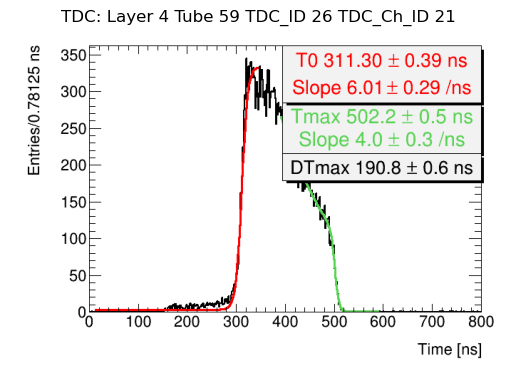

In [ ]:
# re-title plots and save in filtered folder

df = pd.read_csv(run, delimiter=",")

if len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]) > 0:
    number=len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
    print(str(number) + " dead tubes are suppressed.")
    display(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
    new_df=df.loc[(df['Resolution[um]']!=0) & (df['Efficiency']!=0)]
else:
    display("There are no dead tubes.")
display(new_df)
print(len(df))
print(len(new_df))

wanted_adcs, wanted_tdcs, a_titles, t_titles=grab(new_df,spectra_path)

new_title_edit(wanted_adcs,wanted_tdcs, spectra_path,a_titles, t_titles)

In [ ]:
# Get list of all spectra
all_folder=spectra_path+"\\"+"re_title"
all_files=os.listdir(all_folder)
# print(all_folder)
# print(all_files)

pngs=[]
for i in all_files:
    #print(i)
    if "TestData" in i:
        pngs.append(i)
#print(pngs)
        
# Create summary image with every spectra generated
concat_imgs(pngs, all_folder, 8, "All Images")

In [ ]:
def dead_tube_check(input_file):
    df = pd.read_csv(input_file, delimiter=",")

    if len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]) > 0:
        number=len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
        print(str(number) + " dead tubes are suppressed.")
        display(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
    else:
        display("There are no dead tubes.")

In [ ]:
#Choose run of interest
def calc_stats_txt(input_txt_file, output_txt_folder):

    # import txt file as df
    df = pd.read_csv(input_txt_file, delimiter=",") #import txt file

    # check for dead tubes
    with open(output_txt_folder+"\\"+"stats.txt", "w") as file:
        if len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]) > 0:
            number=len(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
            file.write(str(number) + " dead tubes are suppressed.\n")
            file.write("\n")
            file.write("Dead Tubes:\n")
            #display(df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)])
            df_dead=df.loc[(df['Resolution[um]']==0) & (df['Efficiency']==0)]
            df_string = df_dead.to_string(header=True, index=False)
            file.write(df_string + '\n')
            file.write("\n")
        else:
            file.write("There are no dead tubes.\n")
            file.write("\n")

    # find stats for only alive tubes
    df=df.loc[(df['Resolution[um]']>0) & (df['Efficiency']>0)] #select alive tubes
    mins=df.min().to_frame()
    mins.columns=["Min"]
    maxes=df.max().to_frame()
    maxes.columns=["Max"]
    means=df.mean().to_frame()
    means.columns=["Mean"]
    summary=pd.concat([mins,maxes,means],axis=1)
    summary=summary.drop(labels=["Column", "Layer", "TDC_id", "TDC_Ch_id"], axis=0, inplace=False)
    
    with open(output_txt_folder+"\\"+"stats.txt", 'a') as f:
        f.write("Statistics (excluding dead tubes):\n")
        df_string = summary.to_string(header=True, index=True)
        f.write(df_string + '\n')

    #summary.to_csv('output.txt', sep='\t', index=True)

    return

In [2]:
run=r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\eye_scanning\Mod34_BIS5C10_CosmicRay_Thr108.txt"
# output_folder=r"C:\Users\svene\OneDrive\Documents\Tufts\Research\qual\working_files"
# avgs=calc_stats_txt(run,output_folder)

In [3]:
#call specific tdc and tdc id
df = pd.read_csv(run, delimiter=",")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
#display(df.loc[(df['Column']==1) & (df['Layer']==3)])
display(df.loc[(df["ADC_peak[ns]"]<120)])
#display(df)

,Column,Layer,TDC_id,TDC_Ch_id,T0[ns],TMax[ns],ADC_peak[ns],ADC_width[ns],Resolution[um],Efficiency
360,46,1,14,18,285.205761,193.621667,117.970477,7.548115,108.617893,0.979641
363,46,4,14,17,282.375531,193.214569,100.000000,6.783993,107.691934,0.991989
